# Operasi Konvolusi

In [1]:
from PIL import Image
import numpy as np

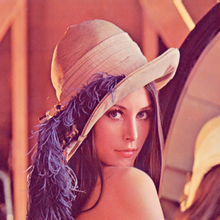

In [2]:
image_path = "images/lenna.png"
image = Image.open(image_path)
image

In [3]:
image_array = np.asarray(image) # transformasi gambar menjadi array (matriks)
print("Ukuran gambar\nheight, width, channel(rgb) =", image_array.shape)

Ukuran gambar
height, width, channel(rgb) = (220, 220, 3)


## Konvolusi 2 dimensi

In [4]:
def relu(x):
    if x >= 0:
        return x
    else:
        return 0
def convolution2d(image, kernel):
    height_kernel, width_kernel = kernel.shape
    
    height, width = image.shape

    image_filtered = np.zeros((height - height_kernel + 1, width - width_kernel + 1))

    for i in range(image_filtered.shape[0]):
        for j in range(image_filtered.shape[1]):
            image_filtered[i, j] = relu((image[i:(i + height_kernel), j:(j + width_kernel)] * kernel).sum())
    return image_filtered

In [5]:
# fungsi konvolusi untuk gambar
# karena gambar memiliki 3 channel (red, green, blue)
# sedangkan fungsi konvolusi sebelumnya hanya untuk matriks 2 dimensi (height x weight)
# jadi diperlukan perulangan sebanyak 3 kali 
def convolution_for_image(image, kernel):
    image = np.transpose(image, (2, 0, 1)) # transpose matriks dari (h, w, channel) menjadi (channel, h, w)
    image_filtered = np.zeros((image.shape[0], image.shape[1] - kernel.shape[0] + 1, image.shape[2] - kernel.shape[1] + 1)) # inisialiasi matriks baru yang nantinya akan di-replace oleh matriks baru hasil konvolusi

    for i, channel in enumerate(image_filtered):
        image_filtered[i] = convolution2d(image[i], kernel)
    
    image_filtered = np.transpose(image_filtered, (1, 2, 0)).astype('uint8') # transpose matriks ke bentuk semula (h, w, channel)
    return image_filtered

## Kernel (filter)

**Sumber:** [https://en.wikipedia.org/wiki/Kernel_(image_processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing))

In [6]:
identity = np.array([[0, 0, 0],
                    [0, 1, 0], 
                    [0, 0, 0]])

edge_detection1 = np.array([[1, 0, -1],
                            [0, 0, 0],
                            [-1, 0, 1]])

edge_detection2 = np.array([[0, -1, -0],
                            [-1, 4, -1],
                            [0, -1, 0]])

edge_detection3 = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, -1]])

sharpen = np.array([[0, -1, -0],
                    [-1, 5, -1],
                    [0, -1, 0]])

box_blur = (1/9) * np.ones((3, 3))

gaussian_blur3x3 = (1/16) * np.array([[1, 2, 1],
                                    [2, 4, 2],
                                    [1, 2, 1]])

gaussian_blur5x5 = (1/256) * np.array([[1, 4, 6, 4, 1],
                                    [4, 16, 24, 16, 4], 
                                    [6, 24, 36, 24, 6], 
                                    [4, 16, 24, 16, 4], 
                                    [1, 4, 6, 4, 1]])

unsharp_masking = (-1/256) * np.array([[1, 4, 6, 4, 1], 
                                    [4, 16, 24, 16, 4], 
                                    [6, 24, -476, 24, 6], 
                                    [4, 16, 24, 16, 4], 
                                    [1, 4, 6, 4, 1]])

In [7]:
edge_detection4 = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])
edge_detection5 = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])

### 1. Filter dengan kernel edge_detection 1

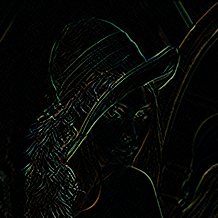

In [8]:
image_filtered = convolution_for_image(image_array, edge_detection1)
Image.fromarray(image_filtered)
# image_filtered

### 2. Filter dengan kernel edge_detection 2

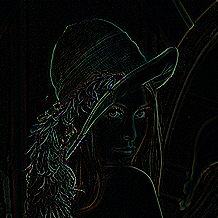

In [9]:
image_filtered = convolution_for_image(image_array, edge_detection2)
Image.fromarray(image_filtered)

### 3. Filter dengan kernel edge_detection 3

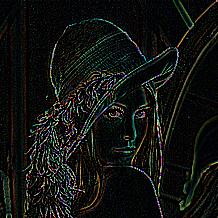

In [10]:
image_filtered = convolution_for_image(image_array, edge_detection3)
Image.fromarray(image_filtered)

### 4. Filter dengan kernel sharpen

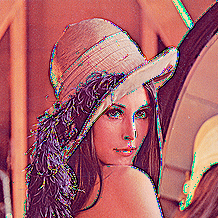

In [11]:
image_filtered = convolution_for_image(image_array, sharpen)
Image.fromarray(image_filtered)

### 5. Filter dengan kernel box_blur

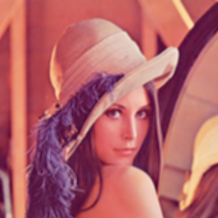

In [12]:
image_filtered = convolution_for_image(image_array, box_blur)
Image.fromarray(image_filtered)

### 6. Filter dengan kernel gaussian_blur3x3

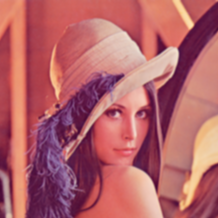

In [13]:
image_filtered = convolution_for_image(image_array, gaussian_blur3x3)
Image.fromarray(image_filtered)

### 7. Filter dengan kernel gaussian_blur5x5

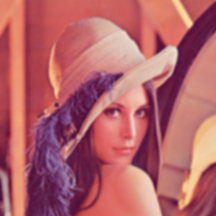

In [14]:
image_filtered = convolution_for_image(image_array, gaussian_blur5x5)
Image.fromarray(image_filtered)

### 8. Filter dengan kernel unsharp_masking

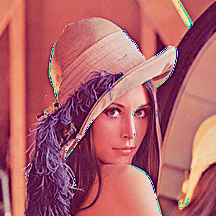

In [15]:
image_filtered = convolution_for_image(image_array, unsharp_masking)
Image.fromarray(image_filtered)

### 9. Filter dengan kernel edge_detection4

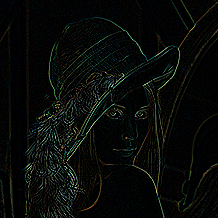

In [16]:
image_filtered = convolution_for_image(image_array, edge_detection4)
Image.fromarray(image_filtered)

### 8. Filter dengan kernel "Strong" edge_detection5

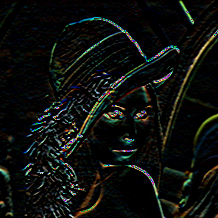

In [17]:
image_filtered = convolution_for_image(image_array, edge_detection5)
Image.fromarray(image_filtered)